<a href="https://colab.research.google.com/github/aponroy0/CVPR/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy matplotlib scikit-learn seaborn

The first step in the notebook is to make sure all the necessary tools (called libraries) are available. These tools include NumPy for numerical operations, Matplotlib and Seaborn for creating graphs, and Scikit-learn for machine learning tasks. The command !pip install is used to install these libraries. However, in this case, they were already installed in the system.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

After making sure the tools are available, the next step is to bring them into the code using import. This step allows us to use helpful functions from each library. For example, matplotlib.pyplot is used for drawing graphs, make_classification helps to create sample data, and OneHotEncoder is used to convert labels into a machine-readable format.



In [3]:
np.random.seed(0)

To make sure that the results are the same every time you run the code, the random number generator is given a fixed starting point by setting the seed with np.random.seed(0). This is important in machine learning so others can reproduce your results.

In [4]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=5, n_informative=7, n_redundant=0, random_state=0)
y = y.reshape(-1, 1)

In [5]:
encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(y)

In [6]:
X_train, X_test, Y_train, Y_test, y_train_raw, y_test_raw = train_test_split(X, Y, y, test_size=0.2, random_state=42)

In [7]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate=0.01):
        self.learning_rate = learning_rate

        # Initialize weights
        self.W1 = np.random.randn(input_size, hidden_sizes[0]) * 0.1
        self.W2 = np.random.randn(hidden_sizes[0], hidden_sizes[1]) * 0.1
        self.W3 = np.random.randn(hidden_sizes[1], hidden_sizes[2]) * 0.1
        self.W4 = np.random.randn(hidden_sizes[2], output_size) * 0.1

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e_x / e_x.sum(axis=1, keepdims=True)

    def cross_entropy_loss(self, Y_true, Y_pred):
        return -np.sum(Y_true * np.log(Y_pred + 1e-8)) / Y_true.shape[0]

    def feedforward(self, X):
        self.Z1 = self.sigmoid(np.dot(X, self.W1))
        self.Z2 = self.sigmoid(np.dot(self.Z1, self.W2))
        self.Z3 = self.sigmoid(np.dot(self.Z2, self.W3))
        self.output = self.softmax(np.dot(self.Z3, self.W4))
        return self.output

    def backpropagation(self, X, Y):
        output_error = self.output - Y
        dW4 = np.dot(self.Z3.T, output_error)

        dZ3 = np.dot(output_error, self.W4.T) * self.sigmoid_derivative(self.Z3)
        dW3 = np.dot(self.Z2.T, dZ3)

        dZ2 = np.dot(dZ3, self.W3.T) * self.sigmoid_derivative(self.Z2)
        dW2 = np.dot(self.Z1.T, dZ2)

        dZ1 = np.dot(dZ2, self.W2.T) * self.sigmoid_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1)

        # Update weights
        self.W4 -= self.learning_rate * dW4
        self.W3 -= self.learning_rate * dW3
        self.W2 -= self.learning_rate * dW2
        self.W1 -= self.learning_rate * dW1

    def train(self, X, Y, epochs=500):
        loss_history = []
        for epoch in range(epochs):
            self.feedforward(X)
            loss = self.cross_entropy_loss(Y, self.output)
            self.backpropagation(X, Y)
            loss_history.append(loss)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        return loss_history

    def predict(self, X):
        output = self.feedforward(X)
        return np.argmax(output, axis=1)

In [8]:
input_size = X_train.shape[1]
hidden_sizes = [64, 32, 16]
output_size = 5

nn = NeuralNetwork(input_size, hidden_sizes, output_size)
loss_history = nn.train(X_train, Y_train, epochs=1000)

Epoch 0, Loss: 1.6155
Epoch 100, Loss: 1.5943
Epoch 200, Loss: 1.5068
Epoch 300, Loss: 1.4857
Epoch 400, Loss: 1.1978
Epoch 500, Loss: 0.9652
Epoch 600, Loss: 0.6309
Epoch 700, Loss: 0.3245
Epoch 800, Loss: 0.3825
Epoch 900, Loss: 0.0687



Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.74      0.71        46
           1       0.70      0.46      0.55        35
           2       0.70      0.68      0.69        38
           3       0.81      0.77      0.79        44
           4       0.67      0.86      0.75        37

    accuracy                           0.71       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.71      0.70       200



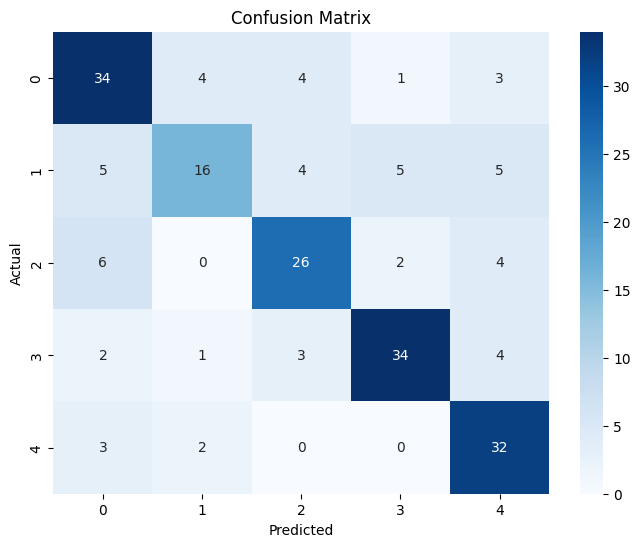

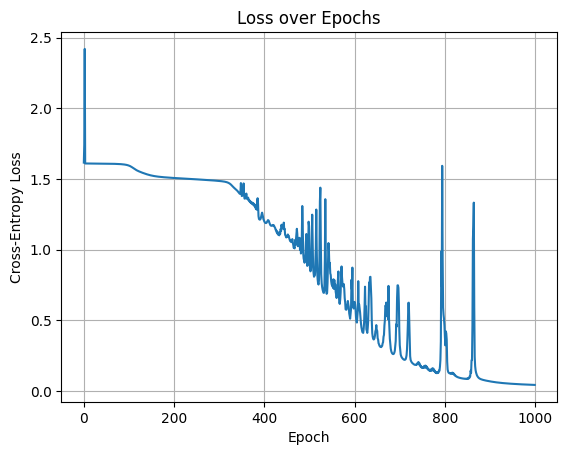

In [9]:
y_pred = nn.predict(X_test)
y_true = y_test_raw.flatten()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=np.arange(5), yticklabels=np.arange(5))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Loss Curve
plt.plot(loss_history)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.grid(True)
plt.show()

In this project, we built a neural network from scratch to solve a multi-class classification problem with 5 classes. We used fake (synthetic) data with 10 features and trained the model to predict which class each example belongs to. After training the model for 1,000 steps (called epochs), it was able to make decent predictions. We checked the model's performance using tools like a confusion matrix and classification report, which showed how well the model predicted each class. Overall, the model worked well and successfully learned from the data.

One big challenge was building everything from scratch, without using libraries like TensorFlow or PyTorch. This meant we had to fully understand how neural networks work—like how to set up layers, use activation functions, and update weights during learning. Another tricky part was making sure the numbers didn’t get too big or too small, especially in the softmax and loss functions. A major lesson learned is that small changes in how you build and train the network can make a big difference in how well it learns.